# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
#1. Sentiment Analysis

#Use the newsapi to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

#Use descriptive statistics to answer the following questions:

#Which coin had the highest mean positive score?

#A. Ethereum with .79 (79%)

#Which coin had the highest negative score?

#A. Both Ethereum and Bitcoin had the same negative score; .372 (37.2%)

#Which coin had the highest positive score?

#A. Ethereum with .349 (34.9%)

In [2]:
import newsapi

In [3]:
import pandas as pd 
import numpy as np 


#import nltk for natural language toolkit
import nltk 
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


#import string, regex, , uniqcode
import re, string, unicodedata

#import sklearn preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#import sklearn for modeling
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#import sklearn for model evaluation 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#import visualization module 
import matplotlib.pyplot as plt
import seaborn as sns

#import tqdm 
from tqdm import tqdm 
tqdm.pandas()

#import beaurtiful soup 
from bs4 import BeautifulSoup

#save model 
import pickle 

#textblob
from textblob import Word


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tylerscott/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
!pip install vader

In [5]:
!pip install newsapi-python

In [6]:
!pip install nltk

In [7]:
!pip install textblob 
from textblob import TextBlob

In [8]:
# https://newsapi.org/v2/everything
import requests
API_URL = 'https://newsapi.org/v2/everything'
NEWS_API_KEY = "203796d49d894f5d986c5a4d541ce368"
def extract_data(q,language,pageSize):
    #define the parameter that are needed
    bitcoin_data = {'q': q,
           'language': language ,
#            'domain':domain,
            'pageSize': pageSize,
           'apiKey': NEWS_API_KEY}
    
    #call the api and store into json format
    response = requests.get(API_URL, bitcoin_data)
    bitcoin_data = response.json()
    
    bitcoin_data = pd.DataFrame(bitcoin_data['articles'])
    
        
    # store into dataframe
#     df = pd.DataFrame.from_dict(data, orient='index')
    return bitcoin_data

In [9]:
NEWS_API_KEY = "203796d49d894f5d986c5a4d541ce368"

In [10]:
# Fetch the Bitcoin news articles
#bitcoin_headlines = newsapi_client.get_top_headlines(q="bitcoin", language="en", country="ca")

bitcoin_data = extract_data('bitcoin','en',100)

In [11]:
test = bitcoin_data['source'].reset_index()

In [12]:
for index in test.index :
   bitcoin_data['source'][index] = test['source'][index]['name']

In [13]:
bitcoin_data.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,Gizmodo.com,Passant Rabie,Jay-Z and Jack Dorsey Launch Bitcoin Academy f...,"Rapper and entrepreneur Shawn Carter, better k...",https://gizmodo.com/jay-z-jack-dorsey-bitcoin-...,https://i.kinja-img.com/gawker-media/image/upl...,2022-06-09T19:45:00Z,"Rapper and entrepreneur Shawn Carter, better k..."
1,BBC News,https://www.facebook.com/bbcnews,El Salvador: The country where you can buy any...,The cryptocurrency crash is hurting many inves...,https://www.bbc.co.uk/news/technology-61813845,https://ichef.bbci.co.uk/news/1024/branded_new...,2022-06-16T01:15:20Z,By Joe TidyCyber reporter \r\nCryptocurrencies...
2,CNN,"Philip Wang and Tara Subramaniam, CNN",El Salvador's Bitcoin investment suffers amid ...,El Salvador has embraced Bitcoin like no other...,https://www.cnn.com/2022/06/14/americas/el-sal...,https://cdn.cnn.com/cnnnext/dam/assets/2205221...,2022-06-15T00:38:11Z,(CNN)El Salvador has embraced Bitcoin like no ...
3,Engadget,Billy Steele,Recommended Reading: A blockchain primer,Does the crypto crash mean the blockchain Is o...,https://www.engadget.com/recommended-reading-a...,https://s.yimg.com/os/creatr-uploaded-images/2...,2022-06-25T14:00:11Z,"Stephen J. Dubner, Freakonomics Radio\r\nIn th..."
4,Gizmodo.com,Mack DeGeurin,Three Arrows Capital Ordered to Liquidate All ...,The rapid collapse of the massive crypto hedge...,https://gizmodo.com/three-arrows-capital-bitco...,https://i.kinja-img.com/gawker-media/image/upl...,2022-06-29T21:06:00Z,"Three Arrows Capital, one of the crypto indust..."


In [14]:
# Create the Bitcoin sentiment scores DataFrame

# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

# # Sentiment scores dictionaries

In [15]:
# # Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
content_sent = {
    "content_compound": [],
    "content_pos": [],
    "content_neu": [],
    "content_neg": [],
    "content_sent": [],
}

In [16]:
# Sentiment analysis of bitcoin_df
for index, row in bitcoin_data.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))
        
        # Sentiment scoring with VADER
        content_sentiment = analyzer.polarity_scores(row["content"])
        content_sent["content_compound"].append(content_sentiment["compound"])
        content_sent["content_pos"].append(content_sentiment["pos"])
        content_sent["content_neu"].append(content_sentiment["neu"])
        content_sent["content_neg"].append(content_sentiment["neg"])
        content_sent["content_sent"].append(get_sentiment(content_sentiment["compound"]))
    except AttributeError:
        pass

In [17]:
# Attaching sentiment columns to the Bitcoin DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
content_sentiment_df = pd.DataFrame(content_sent)
bitcoin_sentiment_df = bitcoin_data.join(title_sentiment_df).join(content_sentiment_df)

bitcoin_sentiment_df.head(5)

,source,author,title,description,url,urlToImage,publishedAt,content,title_compound,title_pos,title_neu,title_neg,title_sent,content_compound,content_pos,content_neu,content_neg,content_sent
0,Gizmodo.com,Passant Rabie,Jay-Z and Jack Dorsey Launch Bitcoin Academy f...,"Rapper and entrepreneur Shawn Carter, better k...",https://gizmodo.com/jay-z-jack-dorsey-bitcoin-...,https://i.kinja-img.com/gawker-media/image/upl...,2022-06-09T19:45:00Z,"Rapper and entrepreneur Shawn Carter, better k...",0.0000,0.000,1.000,0.000,0,0.4404,0.077,0.923,0.000,1
1,BBC News,https://www.facebook.com/bbcnews,El Salvador: The country where you can buy any...,The cryptocurrency crash is hurting many inves...,https://www.bbc.co.uk/news/technology-61813845,https://ichef.bbci.co.uk/news/1024/branded_new...,2022-06-16T01:15:20Z,By Joe TidyCyber reporter \r\nCryptocurrencies...,0.0000,0.000,1.000,0.000,0,0.2960,0.134,0.792,0.074,1
2,CNN,"Philip Wang and Tara Subramaniam, CNN",El Salvador's Bitcoin investment suffers amid ...,El Salvador has embraced Bitcoin like no other...,https://www.cnn.com/2022/06/14/americas/el-sal...,https://cdn.cnn.com/cnnnext/dam/assets/2205221...,2022-06-15T00:38:11Z,(CNN)El Salvador has embraced Bitcoin like no ...,-0.4767,0.000,0.693,0.307,-1,0.1027,0.087,0.867,0.046,1
3,Engadget,Billy Steele,Recommended Reading: A blockchain primer,Does the crypto crash mean the blockchain Is o...,https://www.engadget.com/recommended-reading-a...,https://s.yimg.com/os/creatr-uploaded-images/2...,2022-06-25T14:00:11Z,"Stephen J. Dubner, Freakonomics Radio\r\nIn th...",0.2023,0.375,0.625,0.000,1,0.2023,0.060,0.940,0.000,1
4,Gizmodo.com,Mack DeGeurin,Three Arrows Capital Ordered to Liquidate All ...,The rapid collapse of the massive crypto hedge...,https://gizmodo.com/three-arrows-capital-bitco...,https://i.kinja-img.com/gawker-media/image/upl...,2022-06-29T21:06:00Z,"Three Arrows Capital, one of the crypto indust...",0.1779,0.116,0.884,0.000,1,-0.7579,0.000,0.831,0.169,-1


In [18]:
bitcoin_sentiment_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,content_compound,content_pos,content_neu,content_neg,content_sent
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.097192,0.050870,0.836980,0.112140,-0.19000,-0.020293,0.063660,0.867340,0.069040,-0.020000
std,0.309333,0.098658,0.178199,0.155316,0.72048,0.444612,0.066239,0.082001,0.071378,0.909878
min,-0.908100,0.000000,0.284000,0.000000,-1.00000,-0.948500,0.000000,0.628000,0.000000,-1.000000
25%,-0.296000,0.000000,0.740500,0.000000,-1.00000,-0.366350,0.000000,0.814750,0.000000,-1.000000
50%,0.000000,0.000000,0.880000,0.000000,0.00000,0.000000,0.063000,0.866000,0.066000,0.000000
75%,0.000000,0.083500,1.000000,0.208750,0.00000,0.361200,0.098500,0.920750,0.106000,1.000000
max,0.771700,0.492000,1.000000,0.716000,1.00000,0.865500,0.269000,1.000000,0.372000,1.000000


In [19]:
# Fetch the Ethereum news articles

ethereum_data1 = extract_data('ethereum','en',100)

In [20]:
for index in test.index :
   ethereum_data1['source'][index] = test['source'][index]['name']

In [21]:
ethereum_data1.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,Gizmodo.com,Kris Holt,‘Axie Infinity’ hack victims will only get bac...,"Sky Mavis, the developer of blockchain game Ax...",https://www.engadget.com/games-gaming-axie-inf...,https://s.yimg.com/os/creatr-uploaded-images/2...,2022-06-24T20:24:21Z,"Sky Mavis, the developer of blockchain game Ax..."
1,BBC News,Matt Novak,"Guy Who Told Everyone to Buy Ethereum at $2,90...","Jim Cramer, the CNBC host who’s reportedly wor...",https://gizmodo.com/jim-cramer-margaritas-bad-...,https://i.kinja-img.com/gawker-media/image/upl...,2022-06-23T10:00:00Z,"Jim Cramer, the CNBC host whos reportedly wort..."
2,CNN,Devindra Hardawar,Elaborate hack of 'Axie Infinity' tied to fake...,Axie Infinity was the prime example of crypto ...,https://www.engadget.com/axie-infinity-blockch...,https://s.yimg.com/os/creatr-uploaded-images/2...,2022-07-06T21:00:17Z,Axie Infinity was the prime example of crypto ...
3,Engadget,BeauHD,Ethereum Mining No Longer Profitable For Many ...,"For the first time since 2020, Ethereum mining...",https://news.slashdot.org/story/22/06/17/22122...,https://a.fsdn.com/sd/topics/bitcoin_64.png,2022-06-18T02:02:00Z,"The price of Ethereum has dropped below $1,250..."
4,Gizmodo.com,Eric Mack,MoonDAO Will Pick 2 of the Next Blue Origin As...,A community of cryptocurrency enthusiasts crow...,https://www.cnet.com/science/space/moondao-wil...,https://www.cnet.com/a/img/resize/20ea14566405...,2022-06-09T20:56:00Z,"A decentralized autonomous organization, or DA..."


In [22]:
ethereum_data1.describe()

,source,author,title,description,url,urlToImage,publishedAt,content
count,100,83,100,100,100,100,100,100
unique,19,71,99,99,100,99,100,94
top,Reuters,EditorDavid,Cryptoverse: The bonfire of the NFTs - Reuters...,"The NFT dream isn't dead, but it's taken a big...",https://www.engadget.com/games-gaming-axie-inf...,https://a.fsdn.com/sd/topics/money_64.png,2022-06-24T20:24:21Z,The New Consumer— by Dan Frommer\r\nA publicat...
freq,38,3,2,2,1,2,1,5


In [23]:
#

In [24]:
# Create the ethereum sentiment scores DataFrame

# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result


In [25]:
# # Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
content_sent = {
    "content_compound": [],
    "content_pos": [],
    "content_neu": [],
    "content_neg": [],
    "content_sent": [],
}

In [26]:
# Sentiment analysis of bitcoin_df
for index, row in ethereum_data1.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))
        
        # Sentiment scoring with VADER
        content_sentiment = analyzer.polarity_scores(row["content"])
        content_sent["content_compound"].append(content_sentiment["compound"])
        content_sent["content_pos"].append(content_sentiment["pos"])
        content_sent["content_neu"].append(content_sentiment["neu"])
        content_sent["content_neg"].append(content_sentiment["neg"])
        content_sent["content_sent"].append(get_sentiment(content_sentiment["compound"]))
    except AttributeError:
        pass

In [27]:
# Create the Ethereum sentiment scores DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
content_sentiment_df = pd.DataFrame(content_sent)
ethereum_sentiment_df = ethereum_data1.join(title_sentiment_df).join(content_sentiment_df)

ethereum_sentiment_df.head(5)

,source,author,title,description,url,urlToImage,publishedAt,content,title_compound,title_pos,title_neu,title_neg,title_sent,content_compound,content_pos,content_neu,content_neg,content_sent
0,Gizmodo.com,Kris Holt,‘Axie Infinity’ hack victims will only get bac...,"Sky Mavis, the developer of blockchain game Ax...",https://www.engadget.com/games-gaming-axie-inf...,https://s.yimg.com/os/creatr-uploaded-images/2...,2022-06-24T20:24:21Z,"Sky Mavis, the developer of blockchain game Ax...",-0.5574,0.000,0.723,0.277,-1,-0.7184,0.000,0.846,0.154,-1
1,BBC News,Matt Novak,"Guy Who Told Everyone to Buy Ethereum at $2,90...","Jim Cramer, the CNBC host who’s reportedly wor...",https://gizmodo.com/jim-cramer-margaritas-bad-...,https://i.kinja-img.com/gawker-media/image/upl...,2022-06-23T10:00:00Z,"Jim Cramer, the CNBC host whos reportedly wort...",0.0000,0.000,1.000,0.000,0,0.5106,0.107,0.893,0.000,1
2,CNN,Devindra Hardawar,Elaborate hack of 'Axie Infinity' tied to fake...,Axie Infinity was the prime example of crypto ...,https://www.engadget.com/axie-infinity-blockch...,https://s.yimg.com/os/creatr-uploaded-images/2...,2022-07-06T21:00:17Z,Axie Infinity was the prime example of crypto ...,-0.4767,0.000,0.763,0.237,-1,0.2263,0.077,0.923,0.000,1
3,Engadget,BeauHD,Ethereum Mining No Longer Profitable For Many ...,"For the first time since 2020, Ethereum mining...",https://news.slashdot.org/story/22/06/17/22122...,https://a.fsdn.com/sd/topics/bitcoin_64.png,2022-06-18T02:02:00Z,"The price of Ethereum has dropped below $1,250...",0.7579,0.380,0.524,0.096,1,0.2732,0.063,0.937,0.000,1
4,Gizmodo.com,Eric Mack,MoonDAO Will Pick 2 of the Next Blue Origin As...,A community of cryptocurrency enthusiasts crow...,https://www.cnet.com/science/space/moondao-wil...,https://www.cnet.com/a/img/resize/20ea14566405...,2022-06-09T20:56:00Z,"A decentralized autonomous organization, or DA...",0.4019,0.162,0.838,0.000,1,0.5859,0.134,0.866,0.000,1


In [28]:
# Describe the Ethereum Sentiment
ethereum_sentiment_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,content_compound,content_pos,content_neu,content_neg,content_sent
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.062221,0.069310,0.827780,0.102920,-0.100000,0.039721,0.077730,0.857230,0.065020,0.010000
std,0.354422,0.116784,0.183182,0.161208,0.731679,0.490716,0.073406,0.084836,0.070487,0.926545
min,-0.908100,0.000000,0.353000,0.000000,-1.000000,-0.948500,0.000000,0.628000,0.000000,-1.000000
25%,-0.226300,0.000000,0.720000,0.000000,-1.000000,-0.381800,0.000000,0.814000,0.000000,-1.000000
50%,0.000000,0.000000,0.844500,0.000000,0.000000,0.000000,0.066500,0.861000,0.061000,0.000000
75%,0.000000,0.121750,1.000000,0.187500,0.000000,0.453775,0.131500,0.920750,0.095000,1.000000
max,0.757900,0.452000,1.000000,0.639000,1.000000,0.877900,0.265000,1.000000,0.372000,1.000000


---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [29]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [30]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [31]:
# Create a list of stopwords coins, highs, lows

lemmatizer.lemmatize('coins')

'coin'

In [32]:
lemmatizer.lemmatize('highs')

'high'

In [33]:
lemmatizer.lemmatize('lows')

'low'

In [34]:
 # lemmatize each word from a list of words
sentence = "Bitcoin reached an all time high today."

# Tokenize the new nlist
words = word_tokenize(sentence)

In [35]:
 # Convert the tokenized words to lower case while lemmatizing
result = [lemmatizer.lemmatize(word) for word in words]

# Print result
print(result)

['Bitcoin', 'reached', 'an', 'all', 'time', 'high', 'today', '.']


In [36]:
 # Initial imports
import pandas as pd
from dotenv import load_dotenv
import os
from newsapi import NewsApiClient


In [37]:
 # Load env variables and read the News API Key enviroment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

Python-dotenv could not parse statement starting at line 6


In [38]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [39]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(q="Bitcoin", language="en", sort_by="relevancy")
bitcoin_articles

{'status': 'ok',
 'totalResults': 10239,
 'articles': [{'source': {'id': None, 'name': 'Gizmodo.com'},
   'author': 'Passant Rabie',
   'title': 'Jay-Z and Jack Dorsey Launch Bitcoin Academy for New Generation of Crypto Bros',
   'description': 'Rapper and entrepreneur Shawn Carter, better known as Jay-Z, is bringing Bitcoin to the place where he grew up. On Thursday, Jay-Z and former Twitter CEO Jack Dorsey announced the launch of Bitcoin Academy, which will offer free classes on cryptocurrency for …',
   'url': 'https://gizmodo.com/jay-z-jack-dorsey-bitcoin-academy-1849040407',
   'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/48fbb5e09973afbe730474c5cb0aadd4.jpg',
   'publishedAt': '2022-06-09T19:45:00Z',
   'content': 'Rapper and entrepreneur Shawn Carter, better known as Jay-Z, is bringing Bitcoin to the place where he grew up. On Thursday, Jay-Z and former Twitter CEO Jack Dorsey announced the launch o

In [40]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [41]:
bitcoin_sentiment_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content,title_compound,title_pos,title_neu,title_neg,title_sent,content_compound,content_pos,content_neu,content_neg,content_sent
0,Gizmodo.com,Passant Rabie,Jay-Z and Jack Dorsey Launch Bitcoin Academy f...,"Rapper and entrepreneur Shawn Carter, better k...",https://gizmodo.com/jay-z-jack-dorsey-bitcoin-...,https://i.kinja-img.com/gawker-media/image/upl...,2022-06-09T19:45:00Z,"Rapper and entrepreneur Shawn Carter, better k...",0.0000,0.000,1.000,0.000,0,0.4404,0.077,0.923,0.000,1
1,BBC News,https://www.facebook.com/bbcnews,El Salvador: The country where you can buy any...,The cryptocurrency crash is hurting many inves...,https://www.bbc.co.uk/news/technology-61813845,https://ichef.bbci.co.uk/news/1024/branded_new...,2022-06-16T01:15:20Z,By Joe TidyCyber reporter \r\nCryptocurrencies...,0.0000,0.000,1.000,0.000,0,0.2960,0.134,0.792,0.074,1
2,CNN,"Philip Wang and Tara Subramaniam, CNN",El Salvador's Bitcoin investment suffers amid ...,El Salvador has embraced Bitcoin like no other...,https://www.cnn.com/2022/06/14/americas/el-sal...,https://cdn.cnn.com/cnnnext/dam/assets/2205221...,2022-06-15T00:38:11Z,(CNN)El Salvador has embraced Bitcoin like no ...,-0.4767,0.000,0.693,0.307,-1,0.1027,0.087,0.867,0.046,1
3,Engadget,Billy Steele,Recommended Reading: A blockchain primer,Does the crypto crash mean the blockchain Is o...,https://www.engadget.com/recommended-reading-a...,https://s.yimg.com/os/creatr-uploaded-images/2...,2022-06-25T14:00:11Z,"Stephen J. Dubner, Freakonomics Radio\r\nIn th...",0.2023,0.375,0.625,0.000,1,0.2023,0.060,0.940,0.000,1
4,Gizmodo.com,Mack DeGeurin,Three Arrows Capital Ordered to Liquidate All ...,The rapid collapse of the massive crypto hedge...,https://gizmodo.com/three-arrows-capital-bitco...,https://i.kinja-img.com/gawker-media/image/upl...,2022-06-29T21:06:00Z,"Three Arrows Capital, one of the crypto indust...",0.1779,0.116,0.884,0.000,1,-0.7579,0.000,0.831,0.169,-1


In [42]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
nltk.download('stopwords')

sw = set(stopwords.words('english'))



# Expand the default stopwords list if necessary
sw_addin = {'the'}

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tylerscott/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
# Complete the tokenizer function
def tokenizer(content):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', content)
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    sw_addin = {'the'}
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addin)]
    
    return tokens

In [44]:
# Create a new tokens column for Bitcoin
bitcoin_sentiment_df['tokens'] = bitcoin_sentiment_df['content'].apply(tokenizer)

bitcoin_sentiment_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content,title_compound,title_pos,title_neu,title_neg,title_sent,content_compound,content_pos,content_neu,content_neg,content_sent,tokens
0,Gizmodo.com,Passant Rabie,Jay-Z and Jack Dorsey Launch Bitcoin Academy f...,"Rapper and entrepreneur Shawn Carter, better k...",https://gizmodo.com/jay-z-jack-dorsey-bitcoin-...,https://i.kinja-img.com/gawker-media/image/upl...,2022-06-09T19:45:00Z,"Rapper and entrepreneur Shawn Carter, better k...",0.0000,0.000,1.000,0.000,0,0.4404,0.077,0.923,0.000,1,"[rapper, entrepreneur, shawn, carter, better, ..."
1,BBC News,https://www.facebook.com/bbcnews,El Salvador: The country where you can buy any...,The cryptocurrency crash is hurting many inves...,https://www.bbc.co.uk/news/technology-61813845,https://ichef.bbci.co.uk/news/1024/branded_new...,2022-06-16T01:15:20Z,By Joe TidyCyber reporter \r\nCryptocurrencies...,0.0000,0.000,1.000,0.000,0,0.2960,0.134,0.792,0.074,1,"[joe, tidycyber, reporter, cryptocurrencies, c..."
2,CNN,"Philip Wang and Tara Subramaniam, CNN",El Salvador's Bitcoin investment suffers amid ...,El Salvador has embraced Bitcoin like no other...,https://www.cnn.com/2022/06/14/americas/el-sal...,https://cdn.cnn.com/cnnnext/dam/assets/2205221...,2022-06-15T00:38:11Z,(CNN)El Salvador has embraced Bitcoin like no ...,-0.4767,0.000,0.693,0.307,-1,0.1027,0.087,0.867,0.046,1,"[cnnel, salvador, ha, embraced, bitcoin, like,..."
3,Engadget,Billy Steele,Recommended Reading: A blockchain primer,Does the crypto crash mean the blockchain Is o...,https://www.engadget.com/recommended-reading-a...,https://s.yimg.com/os/creatr-uploaded-images/2...,2022-06-25T14:00:11Z,"Stephen J. Dubner, Freakonomics Radio\r\nIn th...",0.2023,0.375,0.625,0.000,1,0.2023,0.060,0.940,0.000,1,"[stephen, j, dubner, freakonomics, radioin, in..."
4,Gizmodo.com,Mack DeGeurin,Three Arrows Capital Ordered to Liquidate All ...,The rapid collapse of the massive crypto hedge...,https://gizmodo.com/three-arrows-capital-bitco...,https://i.kinja-img.com/gawker-media/image/upl...,2022-06-29T21:06:00Z,"Three Arrows Capital, one of the crypto indust...",0.1779,0.116,0.884,0.000,1,-0.7579,0.000,0.831,0.169,-1,"[three, arrows, capital, one, crypto, industry..."


In [45]:
# Create a new tokens column for Ethereum

ethereum_sentiment_df['tokens'] = ethereum_sentiment_df['content'].apply(tokenizer)

ethereum_sentiment_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content,title_compound,title_pos,title_neu,title_neg,title_sent,content_compound,content_pos,content_neu,content_neg,content_sent,tokens
0,Gizmodo.com,Kris Holt,‘Axie Infinity’ hack victims will only get bac...,"Sky Mavis, the developer of blockchain game Ax...",https://www.engadget.com/games-gaming-axie-inf...,https://s.yimg.com/os/creatr-uploaded-images/2...,2022-06-24T20:24:21Z,"Sky Mavis, the developer of blockchain game Ax...",-0.5574,0.000,0.723,0.277,-1,-0.7184,0.000,0.846,0.154,-1,"[sky, mavis, developer, blockchain, game, axie..."
1,BBC News,Matt Novak,"Guy Who Told Everyone to Buy Ethereum at $2,90...","Jim Cramer, the CNBC host who’s reportedly wor...",https://gizmodo.com/jim-cramer-margaritas-bad-...,https://i.kinja-img.com/gawker-media/image/upl...,2022-06-23T10:00:00Z,"Jim Cramer, the CNBC host whos reportedly wort...",0.0000,0.000,1.000,0.000,0,0.5106,0.107,0.893,0.000,1,"[jim, cramer, cnbc, host, reportedly, worth, l..."
2,CNN,Devindra Hardawar,Elaborate hack of 'Axie Infinity' tied to fake...,Axie Infinity was the prime example of crypto ...,https://www.engadget.com/axie-infinity-blockch...,https://s.yimg.com/os/creatr-uploaded-images/2...,2022-07-06T21:00:17Z,Axie Infinity was the prime example of crypto ...,-0.4767,0.000,0.763,0.237,-1,0.2263,0.077,0.923,0.000,1,"[axie, infinity, wa, prime, example, crypto, g..."
3,Engadget,BeauHD,Ethereum Mining No Longer Profitable For Many ...,"For the first time since 2020, Ethereum mining...",https://news.slashdot.org/story/22/06/17/22122...,https://a.fsdn.com/sd/topics/bitcoin_64.png,2022-06-18T02:02:00Z,"The price of Ethereum has dropped below $1,250...",0.7579,0.380,0.524,0.096,1,0.2732,0.063,0.937,0.000,1,"[price, ethereum, ha, dropped, energy, price, ..."
4,Gizmodo.com,Eric Mack,MoonDAO Will Pick 2 of the Next Blue Origin As...,A community of cryptocurrency enthusiasts crow...,https://www.cnet.com/science/space/moondao-wil...,https://www.cnet.com/a/img/resize/20ea14566405...,2022-06-09T20:56:00Z,"A decentralized autonomous organization, or DA...",0.4019,0.162,0.838,0.000,1,0.5859,0.134,0.866,0.000,1,"[decentralized, autonomous, organization, dao,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [46]:
from collections import Counter
from nltk import ngrams

In [47]:
# Generate the Bitcoin N-grams where N=2

BS_1 = bitcoin_sentiment_df['content'].str.cat()
processed_1 = tokenizer(BS_1)
BG_1 = Counter(ngrams(processed_1, n=2))

In [48]:
# Generate the Ethereum N-grams where N=2

# Generate the Ethereum N-grams where N=2
BS_2 = ethereum_sentiment_df['content'].str.cat()
processed_2 = tokenizer(BS_2)
BG_2 = Counter(ngrams(processed_2, n=2))

In [49]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [50]:
# Use token_count to get the top 10 words for Bitcoin
top_10_words_btc = token_count(BG_1, 10)

top_10_words_btc

[(('june', 'reuters'), 17),
 (('charsjune', 'reuters'), 12),
 (('reuters', 'bitcoin'), 9),
 (('hedge', 'fund'), 7),
 (('crypto', 'lender'), 7),
 (('arrows', 'capital'), 6),
 (('bitcoin', 'dropped'), 5),
 (('dropped', 'gmt'), 5),
 (('biggest', 'bestknown'), 5),
 (('charslondon', 'june'), 5)]

In [51]:
# Use token_count to get the top 10 words for Ethereum
top_10_words_eth = token_count(BG_2, 10)

top_10_words_eth

[(('charsjune', 'reuters'), 8),
 (('crypto', 'market'), 6),
 (('cryptocurrency', 'market'), 5),
 (('reuters', 'bitcoin'), 5),
 (('biggest', 'bestknown'), 5),
 (('new', 'consumer'), 5),
 (('consumer', 'dan'), 5),
 (('dan', 'frommera'), 5),
 (('frommera', 'publication'), 5),
 (('publication', 'people'), 5)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [52]:
 # Import required libraries
import spacy
from nltk.corpus import reuters
from spacy import displacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt 


# Load the English language model for spaCy
nlp = spacy.load("en_core_web_sm")

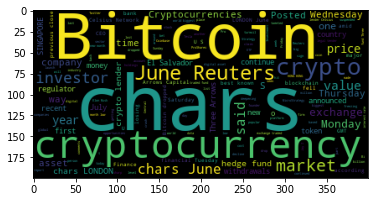

In [53]:
# Generate the Bitcoin word cloud
word_cloud_btc = WordCloud().generate(BS_1)
plt.imshow(word_cloud_btc)

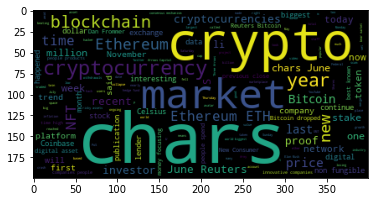

In [54]:
# Generate the Ethereum word cloud
# Generate the Bitcoin word cloud
word_cloud_eth = WordCloud().generate(BS_2)
plt.imshow(word_cloud_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [55]:
import spacy
from spacy import displacy

In [56]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [57]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [58]:
# Concatenate all of the Bitcoin text together
bitcoin_all_text = (BS_1)

In [59]:
# Run the NER processor on all of the text

bit_ner_1 = nlp(bitcoin_all_text)

In [60]:
# Add a title to the document
bit_ner_1.user_data["NER Visualization - Bitcoin"] = "NER Visualization - Bitcoin"

In [61]:
# Render the visualization

displacy.render(bit_ner_1, style='ent')

In [62]:
# Listed all Entities for Bit
for ent in bit_ner_1.ents:
    print(ent.text)

Shawn Carter
Jay-Z
Thursday
Jay-Z
Jack Dorsey
Joe TidyCyber
this week
billions
Bitcoin
Salvador
hundreds
last year
J. Dubner
Freakonomics Radio

Recommended Listening
Freakonomics Radio
three
Bi
+734
Arrows Capital
one
Tuesday
The Paris NFT Day
The Celsius Network
DeFi
Investments
the Securities and Exchange Commission
US
ETF
Just an hour
SEC
13
Reuters
12.1%
23,366
GMT
Monday
3,218.95
51.6%
June 14
Reuters
Tuesday
MicroStrategy Inc
16
Reuters
7.03%
20,969.32
GMT
Thursday
1,585.95
56.5%
18
Reuters
7.46%
18,915.29
15:59
GMT
Saturday
1,525.41
60.8%
18
Reuters
6.53%
19,106.37
0734
GMT
Saturday
1,334.33
the day
as far as $19,047.61
27
Reuters
El Salvador
Nayib Bukele
Bitcoin
more than 50 percent
this year
today
the ProShares Short Bitcoin Strategy ETF
ProShares
first
US
chars]LONDON
June 15
Reuters
Wednesday
18-month
19
Reuters
Sunday
around 7.6%
20,404
Saturday
+1674
as much as 15%
Monday
billions
49.73
Kellogg
the week to June 24
Ilan Rubens
06/14 Bitcoin
Tuesday
18-month
Celsius Network

---

### Ethereum NER

In [63]:
# Concatenate all of the Ethereum text together
ethereum_all_text = (BS_2)

In [64]:
# Run the NER processor on all of the text
eth_ner_1 = nlp(ethereum_all_text)

In [65]:
# Add a title to the document

eth_ner_1.user_data["NER Visualization - Ethereum"] = "NER Visualization - Ethereum"

In [66]:
# Render the visualization

displacy.render(eth_ner_1, style='ent')

In [67]:
# Listed all Entities for Eth
displacy.render(eth_ner_1, style='ent')

---